In [12]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt 
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score

In [3]:
data = pd.read_csv('CarPrice_Assignment.csv')

In [4]:
data.head()

,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,1,3,alfa-romero giulia,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0
1,2,3,alfa-romero stelvio,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0
2,3,1,alfa-romero Quadrifoglio,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0
3,4,2,audi 100 ls,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0
4,5,2,audi 100ls,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0


In [5]:
data.info() # no null values

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 26 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   car_ID            205 non-null    int64  
 1   symboling         205 non-null    int64  
 2   CarName           205 non-null    object 
 3   fueltype          205 non-null    object 
 4   aspiration        205 non-null    object 
 5   doornumber        205 non-null    object 
 6   carbody           205 non-null    object 
 7   drivewheel        205 non-null    object 
 8   enginelocation    205 non-null    object 
 9   wheelbase         205 non-null    float64
 10  carlength         205 non-null    float64
 11  carwidth          205 non-null    float64
 12  carheight         205 non-null    float64
 13  curbweight        205 non-null    int64  
 14  enginetype        205 non-null    object 
 15  cylindernumber    205 non-null    object 
 16  enginesize        205 non-null    int64  
 1

In [6]:
data.describe()

,car_ID,symboling,wheelbase,carlength,carwidth,carheight,curbweight,enginesize,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
count,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000
mean,103.000000,0.834146,98.756585,174.049268,65.907805,53.724878,2555.565854,126.907317,3.329756,3.255415,10.142537,104.117073,5125.121951,25.219512,30.751220,13276.710571
std,59.322565,1.245307,6.021776,12.337289,2.145204,2.443522,520.680204,41.642693,0.270844,0.313597,3.972040,39.544167,476.985643,6.542142,6.886443,7988.852332
min,1.000000,-2.000000,86.600000,141.100000,60.300000,47.800000,1488.000000,61.000000,2.540000,2.070000,7.000000,48.000000,4150.000000,13.000000,16.000000,5118.000000
25%,52.000000,0.000000,94.500000,166.300000,64.100000,52.000000,2145.000000,97.000000,3.150000,3.110000,8.600000,70.000000,4800.000000,19.000000,25.000000,7788.000000
50%,103.000000,1.000000,97.000000,173.200000,65.500000,54.100000,2414.000000,120.000000,3.310000,3.290000,9.000000,95.000000,5200.000000,24.000000,30.000000,10295.000000
75%,154.000000,2.000000,102.400000,183.100000,66.900000,55.500000,2935.000000,141.000000,3.580000,3.410000,9.400000,116.000000,5500.000000,30.000000,34.000000,16503.000000
max,205.000000,3.000000,120.900000,208.100000,72.300000,59.800000,4066.000000,326.000000,3.940000,4.170000,23.000000,288.000000,6600.000000,49.000000,54.000000,45400.000000


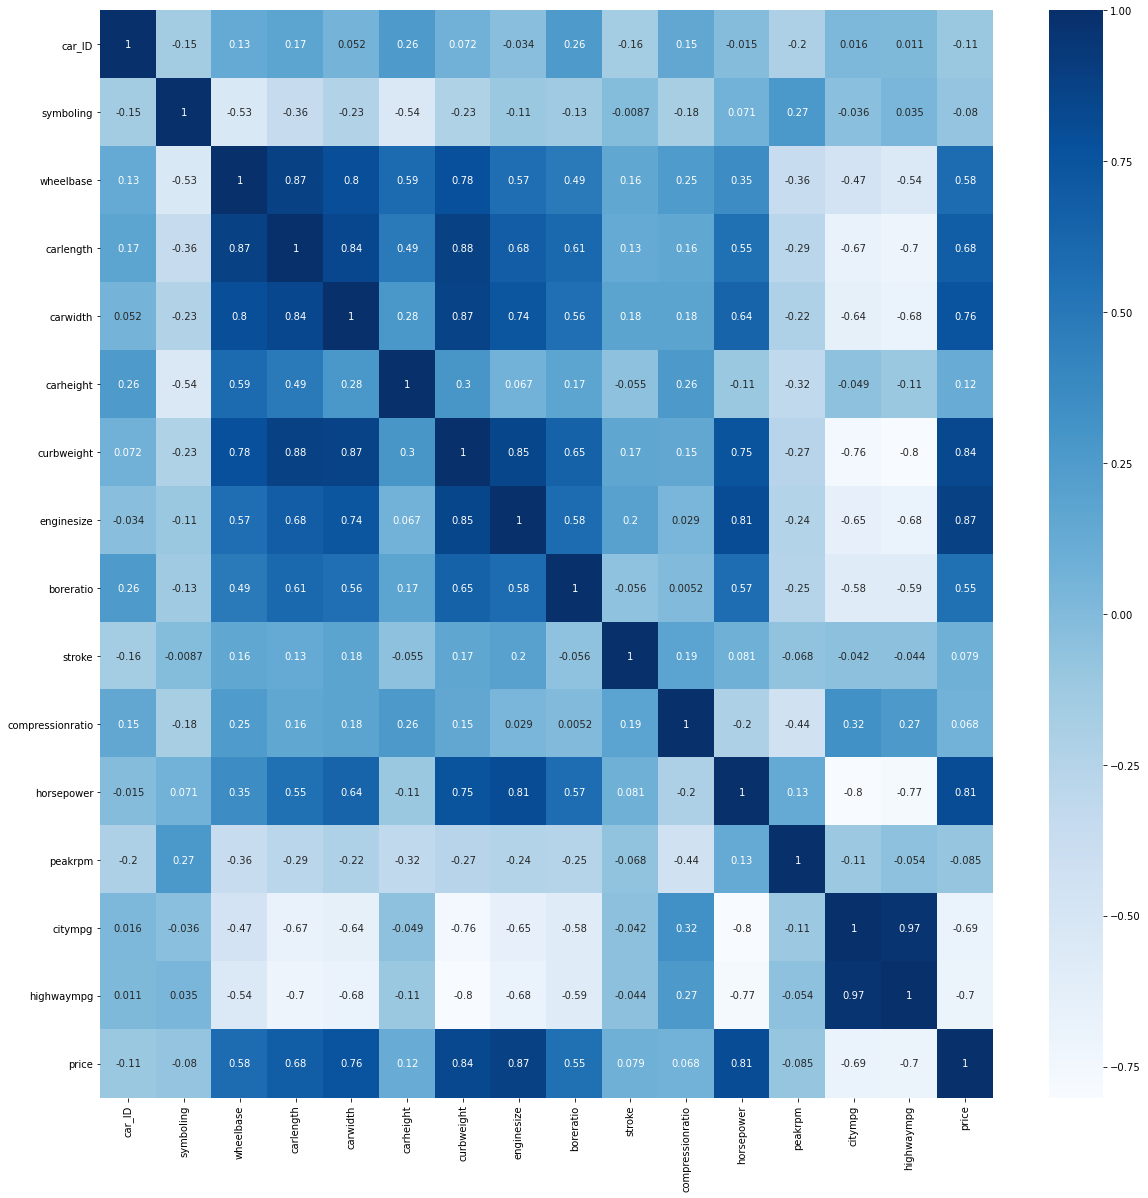

In [20]:
plt.figure(figsize = (20,20))
fig = sns.heatmap(data.corr(), annot = True, cmap = 'Blues')

In [24]:
data_copy = data.drop(['stroke', 'compressionratio', 'CarName'], axis = 1)

In [25]:
data_copy.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 23 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   car_ID          205 non-null    int64  
 1   symboling       205 non-null    int64  
 2   fueltype        205 non-null    object 
 3   aspiration      205 non-null    object 
 4   doornumber      205 non-null    object 
 5   carbody         205 non-null    object 
 6   drivewheel      205 non-null    object 
 7   enginelocation  205 non-null    object 
 8   wheelbase       205 non-null    float64
 9   carlength       205 non-null    float64
 10  carwidth        205 non-null    float64
 11  carheight       205 non-null    float64
 12  curbweight      205 non-null    int64  
 13  enginetype      205 non-null    object 
 14  cylindernumber  205 non-null    object 
 15  enginesize      205 non-null    int64  
 16  fuelsystem      205 non-null    object 
 17  boreratio       205 non-null    flo

In [33]:
# data_copy['doornumber'].replace(axis = {'four': 4, 'two': 2})
data_copy['doornumber'] = data_copy['doornumber'].replace(to_replace = ['two','four'], value = [2,4])

In [34]:
data_copy.head()

,car_ID,symboling,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,carlength,...,enginetype,cylindernumber,enginesize,fuelsystem,boreratio,horsepower,peakrpm,citympg,highwaympg,price
0,1,3,gas,std,2,convertible,rwd,front,88.6,168.8,...,dohc,four,130,mpfi,3.47,111,5000,21,27,13495.0
1,2,3,gas,std,2,convertible,rwd,front,88.6,168.8,...,dohc,four,130,mpfi,3.47,111,5000,21,27,16500.0
2,3,1,gas,std,2,hatchback,rwd,front,94.5,171.2,...,ohcv,six,152,mpfi,2.68,154,5000,19,26,16500.0
3,4,2,gas,std,4,sedan,fwd,front,99.8,176.6,...,ohc,four,109,mpfi,3.19,102,5500,24,30,13950.0
4,5,2,gas,std,4,sedan,4wd,front,99.4,176.6,...,ohc,five,136,mpfi,3.19,115,5500,18,22,17450.0


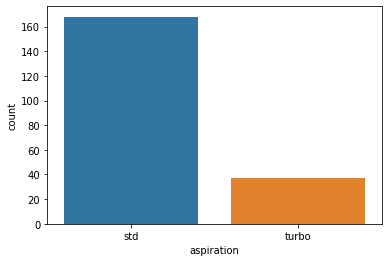

In [35]:
data_copy['doornumber'] = data_copy['doornumber'].replace(to_replace = ['two','four'], value = [2,4])

In [45]:
object_list = [i for i in data_copy.columns if data[i].dtype == 'O']
for i in object_list:
    print(i , ': ')
    print(data_copy[i].value_counts())
    print()

fueltype : 
gas       185
diesel     20
Name: fueltype, dtype: int64

aspiration : 
std      168
turbo     37
Name: aspiration, dtype: int64

doornumber : 
4    115
2     90
Name: doornumber, dtype: int64

carbody : 
sedan          96
hatchback      70
wagon          25
hardtop         8
convertible     6
Name: carbody, dtype: int64

drivewheel : 
fwd    120
rwd     76
4wd      9
Name: drivewheel, dtype: int64

enginelocation : 
front    202
rear       3
Name: enginelocation, dtype: int64

enginetype : 
ohc      148
ohcf      15
ohcv      13
dohc      12
l         12
rotor      4
dohcv      1
Name: enginetype, dtype: int64

cylindernumber : 
four      159
six        24
five       11
eight       5
two         4
twelve      1
three       1
Name: cylindernumber, dtype: int64

fuelsystem : 
mpfi    94
2bbl    66
idi     20
1bbl    11
spdi     9
4bbl     3
mfi      1
spfi     1
Name: fuelsystem, dtype: int64



In [46]:
from sklearn.preprocessing import LabelEncoder

In [47]:
encoder = LabelEncoder()

In [48]:
data_copy['fueltype'] = encoder.fit_transform(data_copy['fueltype'])

In [50]:
double_list = [i for i in data_copy.columns if data[i].dtype == 'O' and len(data[i].unique()) == 2]
for i in double_list:
    data_copy[i] = encoder.fit_transform(data_copy[i])

In [53]:
for i in double_list:
    object_list.remove(i)

In [56]:
data_copy = data_copy.drop(labels = object_list, axis = 1)

In [57]:
data_copy.head()

,car_ID,symboling,fueltype,aspiration,doornumber,enginelocation,wheelbase,carlength,carwidth,carheight,curbweight,enginesize,boreratio,horsepower,peakrpm,citympg,highwaympg,price
0,1,3,1,0,0,0,88.6,168.8,64.1,48.8,2548,130,3.47,111,5000,21,27,13495.0
1,2,3,1,0,0,0,88.6,168.8,64.1,48.8,2548,130,3.47,111,5000,21,27,16500.0
2,3,1,1,0,0,0,94.5,171.2,65.5,52.4,2823,152,2.68,154,5000,19,26,16500.0
3,4,2,1,0,1,0,99.8,176.6,66.2,54.3,2337,109,3.19,102,5500,24,30,13950.0
4,5,2,1,0,1,0,99.4,176.6,66.4,54.3,2824,136,3.19,115,5500,18,22,17450.0


In [59]:
X = data_copy.drop('price', axis = 1)
X.head()

,car_ID,symboling,fueltype,aspiration,doornumber,enginelocation,wheelbase,carlength,carwidth,carheight,curbweight,enginesize,boreratio,horsepower,peakrpm,citympg,highwaympg
0,1,3,1,0,0,0,88.6,168.8,64.1,48.8,2548,130,3.47,111,5000,21,27
1,2,3,1,0,0,0,88.6,168.8,64.1,48.8,2548,130,3.47,111,5000,21,27
2,3,1,1,0,0,0,94.5,171.2,65.5,52.4,2823,152,2.68,154,5000,19,26
3,4,2,1,0,1,0,99.8,176.6,66.2,54.3,2337,109,3.19,102,5500,24,30
4,5,2,1,0,1,0,99.4,176.6,66.4,54.3,2824,136,3.19,115,5500,18,22


In [60]:
y = data_copy['price']
y.head()

0    13495.0
1    16500.0
2    16500.0
3    13950.0
4    17450.0
Name: price, dtype: float64

In [61]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 483)

In [63]:
print(X_train.shape, X_test.shape,y_train.shape,y_test.shape)

(164, 17) (41, 17) (164,) (41,)


In [64]:
linear_reg = LinearRegression()

In [65]:
linear_reg.fit(X_train, y_train)

LinearRegression()

In [66]:
linear_reg.coef_

array([-1.85361655e+01,  2.65832582e+02, -2.00328949e+03, -7.50567571e+02,
       -3.12012599e+02,  1.09227533e+04,  1.96050621e+02, -3.75543855e+01,
        4.95879927e+02,  1.92273446e+02,  2.97525210e+00,  6.29517142e+01,
       -4.89341551e+02,  5.55368391e+01,  5.35594568e-01,  9.68450062e+01,
       -1.14595879e+02])

In [67]:
y_test_a = linear_reg.predict(X_test)

In [68]:
r2_score(y_test, y_test_a)

0.8608995552800544